In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    plot_roc_curve
)

In [3]:
df = pd.read_csv("SharedResponses.csv", nrows=40000000)

In [4]:
df.head(30)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2222sJk4DcoqXXi98,1043988516_3525281295.0,3.525281e+09,2,0,0,0,0,Rand,Random,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2223CNmvTr2Coj4wp,-1613944085_422160228641876.0,4.221602e+14,10,0,1,0,1,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,3.278336e+14,11,0,0,1,0,Old,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2223jMWDEGNeszivb,-1683127088_785070916172117.0,7.850709e+14,8,0,1,0,2,More,Utilitarian,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,22244vvSZfn4J9Zop,1525185249_1436495773909467.0,1.436496e+15,11,0,0,1,0,Low,Social Status,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2224H2QBFKNsMmRQc,1661661891_4304873273230329.0,4.304873e+15,11,0,1,0,0,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2224YxTZcu4sJqTSD,-887960483_174929057557052.0,1.749291e+14,6,0,0,0,2,Hoomans,Species,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9.992829e+15,7,0,0,1,0,Less,Utilitarian,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,2224kBG72574tbZD3,737909459_839962439872333.0,8.399624e+14,12,0,0,1,0,Old,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pd.set_option('display.max_columns', None)
testDF = df[df['ResponseID']  == '2229sLNgv45TmJLtt']
testDF

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
29,2229sLNgv45TmJLtt,-856623494_492281202,492281202.0,5,0,0,0,1,Old,Age,Age,Young,Old,0.0,4.0,0.0,0,Desktop,1.0,1.0,RUS,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895758,2229sLNgv45TmJLtt,-856623494_492281202,492281202.0,5,1,0,1,0,Young,Age,Age,Young,Old,0.0,4.0,0.0,1,Desktop,1.0,0.0,RUS,0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_duplicate = df[df.duplicated(subset = ['ResponseID'], keep = False)] 
df_duplicate

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2222sJk4DcoqXXi98,1043988516_3525281295.0,3.525281e+09,2,0,0,0,0,Rand,Random,Random,NaN,NaN,NaN,1.0,0.0,1,Desktop,0.0,1.0,BEL,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2223CNmvTr2Coj4wp,-1613944085_422160228641876.0,4.221602e+14,10,0,1,0,1,Female,Gender,Gender,Male,Female,0.0,4.0,0.0,1,Mobile,0.0,0.0,ISR,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,3.278336e+14,11,0,0,1,0,Old,Age,Age,Young,Old,0.0,5.0,0.0,0,Desktop,1.0,0.0,MEX,0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2223jMWDEGNeszivb,-1683127088_785070916172117.0,7.850709e+14,8,0,1,0,2,More,Utilitarian,Utilitarian,More,Less,1.0,5.0,2.0,0,Mobile,0.0,0.0,CHE,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35517444,XnzBm8bMMWWvAGaiT,405227531_6554561554046836.0,6.554562e+15,10,1,0,0,1,Hoomans,Species,Species,Hoomans,Pets,0.0,5.0,0.0,1,Mobile,0.0,1.0,BRA,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517446,XnzBtZAKgxHRec2DF,496598798_752716688,7.527167e+08,1,1,0,0,2,Young,Age,Age,Young,Old,0.0,5.0,0.0,1,Desktop,0.0,0.0,USA,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517447,XnzCQwEhXgvveJNhJ,-781809904_5556713810383225.0,5.556714e+15,3,1,1,0,0,Hoomans,Species,Species,Hoomans,Pets,0.0,1.0,0.0,1,Desktop,1.0,0.0,BRA,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517448,XnzD2KnYm7QFba25D,988469396_5339708507641328.0,5.339709e+15,8,1,1,0,0,Male,Gender,Gender,Male,Female,0.0,5.0,0.0,0,Desktop,0.0,1.0,IRL,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df_usa = df_duplicate[df_duplicate['UserCountry3']  == 'USA']
df_usa

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9.992829e+15,7,0,0,1,0,Less,Utilitarian,Utilitarian,More,Less,0.0,4.0,1.0,1,Desktop,1.0,0.0,USA,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,2225giMabFAayqtuZ,119593534_4060326529262035.0,4.060327e+15,2,0,0,0,2,Fit,Fitness,Fitness,Fit,Fat,1.0,4.0,0.0,1,Mobile,0.0,1.0,USA,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2227YepvBZrsgYDSs,1214766696_8665250841981151.0,8.665251e+15,12,0,0,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,1.0,0.0,1,Desktop,1.0,0.0,USA,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2227sfrgkT3R7PnRo,-1065868016_2391726640665288.0,2.391727e+15,11,0,0,0,0,Pets,Species,Species,Hoomans,Pets,0.0,3.0,0.0,0,Desktop,1.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35517435,Xnz9ZfzYtbeKHqvmg,-937820700_4383016682695597.0,4.383017e+15,12,1,1,0,2,Male,Gender,Gender,Male,Female,0.0,3.0,0.0,0,Desktop,0.0,1.0,USA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517438,XnzALku9RTRnT8eiS,-2143894426_2029327766,2.029328e+09,13,1,0,1,0,Old,Age,Age,Young,Old,1.0,5.0,0.0,0,Desktop,1.0,0.0,USA,1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517440,XnzAs6bdvnLKRAuty,651036425_3846725213.0,3.846725e+09,4,1,0,1,0,Fit,Fitness,Fitness,Fit,Fat,0.0,1.0,0.0,0,Mobile,0.0,1.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35517446,XnzBtZAKgxHRec2DF,496598798_752716688,7.527167e+08,1,1,0,0,2,Young,Age,Age,Young,Old,0.0,5.0,0.0,1,Desktop,0.0,0.0,USA,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
indexToDelete = df_usa[ (df_usa['ScenarioTypeStrict']  == 'Random') & (df_usa['ScenarioType']  != 'Random') ].index
df_usa.drop(indexToDelete, inplace=True)
df_usa

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9.992829e+15,7,0,0,1,0,Less,Utilitarian,Utilitarian,More,Less,0.0,4.0,1.0,1,Desktop,1.0,0.0,USA,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,2225giMabFAayqtuZ,119593534_4060326529262035.0,4.060327e+15,2,0,0,0,2,Fit,Fitness,Fitness,Fit,Fat,1.0,4.0,0.0,1,Mobile,0.0,1.0,USA,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2227YepvBZrsgYDSs,1214766696_8665250841981151.0,8.665251e+15,12,0,0,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,1.0,0.0,1,Desktop,1.0,0.0,USA,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2227sfrgkT3R7PnRo,-1065868016_2391726640665288.0,2.391727e+15,11,0,0,0,0,Pets,Species,Species,Hoomans,Pets,0.0,3.0,0.0,0,Desktop,1.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35517435,Xnz9ZfzYtbeKHqvmg,-937820700_4383016682695597.0,4.383017e+15,12,1,1,0,2,Male,Gender,Gender,Male,Female,0.0,3.0,0.0,0,Desktop,0.0,1.0,USA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517438,XnzALku9RTRnT8eiS,-2143894426_2029327766,2.029328e+09,13,1,0,1,0,Old,Age,Age,Young,Old,1.0,5.0,0.0,0,Desktop,1.0,0.0,USA,1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517440,XnzAs6bdvnLKRAuty,651036425_3846725213.0,3.846725e+09,4,1,0,1,0,Fit,Fitness,Fitness,Fit,Fat,0.0,1.0,0.0,0,Mobile,0.0,1.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35517446,XnzBtZAKgxHRec2DF,496598798_752716688,7.527167e+08,1,1,0,0,2,Young,Age,Age,Young,Old,0.0,5.0,0.0,1,Desktop,0.0,0.0,USA,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
indexToDelete = df_usa[ (df_usa['ScenarioTypeStrict']  != 'Random') & (df_usa['ScenarioType']  == 'Random') ].index
df_usa.drop(indexToDelete, inplace=True)
df_usa

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9.992829e+15,7,0,0,1,0,Less,Utilitarian,Utilitarian,More,Less,0.0,4.0,1.0,1,Desktop,1.0,0.0,USA,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,2225giMabFAayqtuZ,119593534_4060326529262035.0,4.060327e+15,2,0,0,0,2,Fit,Fitness,Fitness,Fit,Fat,1.0,4.0,0.0,1,Mobile,0.0,1.0,USA,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2227YepvBZrsgYDSs,1214766696_8665250841981151.0,8.665251e+15,12,0,0,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,1.0,0.0,1,Desktop,1.0,0.0,USA,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2227sfrgkT3R7PnRo,-1065868016_2391726640665288.0,2.391727e+15,11,0,0,0,0,Pets,Species,Species,Hoomans,Pets,0.0,3.0,0.0,0,Desktop,1.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35517435,Xnz9ZfzYtbeKHqvmg,-937820700_4383016682695597.0,4.383017e+15,12,1,1,0,2,Male,Gender,Gender,Male,Female,0.0,3.0,0.0,0,Desktop,0.0,1.0,USA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517438,XnzALku9RTRnT8eiS,-2143894426_2029327766,2.029328e+09,13,1,0,1,0,Old,Age,Age,Young,Old,1.0,5.0,0.0,0,Desktop,1.0,0.0,USA,1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517440,XnzAs6bdvnLKRAuty,651036425_3846725213.0,3.846725e+09,4,1,0,1,0,Fit,Fitness,Fitness,Fit,Fat,0.0,1.0,0.0,0,Mobile,0.0,1.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35517446,XnzBtZAKgxHRec2DF,496598798_752716688,7.527167e+08,1,1,0,0,2,Young,Age,Age,Young,Old,0.0,5.0,0.0,1,Desktop,0.0,0.0,USA,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_first = df_usa.drop_duplicates('ResponseID', keep='first')
df_first.head(30)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9.992829e+15,7,0,0,1,0,Less,Utilitarian,Utilitarian,More,Less,0.0,4.0,1.0,1,Desktop,1.0,0.0,USA,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,2225giMabFAayqtuZ,119593534_4060326529262035.0,4.060327e+15,2,0,0,0,2,Fit,Fitness,Fitness,Fit,Fat,1.0,4.0,0.0,1,Mobile,0.0,1.0,USA,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2227YepvBZrsgYDSs,1214766696_8665250841981151.0,8.665251e+15,12,0,0,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,1.0,0.0,1,Desktop,1.0,0.0,USA,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2227sfrgkT3R7PnRo,-1065868016_2391726640665288.0,2.391727e+15,11,0,0,0,0,Pets,Species,Species,Hoomans,Pets,0.0,3.0,0.0,0,Desktop,1.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
23,2228uPoPgxjZfjSFd,1267756066_2461531300.0,2.461531e+09,1,0,0,1,0,Male,Gender,Gender,Male,Female,1.0,1.0,0.0,1,Desktop,0.0,1.0,USA,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2229huRCf9Qqwg59a,-1701534291_1631800878,1.631801e+09,5,0,1,0,2,Pets,Species,Species,Hoomans,Pets,0.0,5.0,0.0,1,Desktop,0.0,1.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
30,2229tF4FYHybPd42B,-1847355550_4243329021.0,4.243329e+09,11,0,0,0,2,More,Utilitarian,Utilitarian,More,Less,1.0,5.0,2.0,0,Desktop,0.0,1.0,USA,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32,222B4CC4ARzyyupLu,-97218140_2270524675.0,2.270525e+09,13,0,0,0,2,More,Utilitarian,Utilitarian,More,Less,1.0,5.0,1.0,0,Desktop,1.0,1.0,USA,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
33,222B6CnYWs5bnzZFA,-1168254657_7329569779421086.0,7.329570e+15,2,0,0,1,0,Old,Age,Age,Young,Old,0.0,2.0,0.0,0,Desktop,1.0,1.0,USA,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_last = df_usa.drop_duplicates('ResponseID', keep='last')
df_last.head(30)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
8895729,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,1,0,1,0,Fat,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,0,Desktop,1.0,0.0,USA,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895736,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9.992829e+15,7,1,0,0,1,More,Utilitarian,Utilitarian,More,Less,0.0,5.0,1.0,0,Desktop,1.0,1.0,USA,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
8895739,2225giMabFAayqtuZ,119593534_4060326529262035.0,4.060327e+15,2,1,0,1,0,Fat,Fitness,Fitness,Fit,Fat,1.0,4.0,0.0,0,Mobile,0.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895748,2227YepvBZrsgYDSs,1214766696_8665250841981151.0,8.665251e+15,12,1,0,1,0,Fat,Fitness,Fitness,Fit,Fat,1.0,1.0,0.0,0,Desktop,1.0,1.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895750,2227sfrgkT3R7PnRo,-1065868016_2391726640665288.0,2.391727e+15,11,1,0,1,0,Hoomans,Species,Species,Hoomans,Pets,0.0,3.0,0.0,1,Desktop,0.0,1.0,USA,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895752,2228uPoPgxjZfjSFd,1267756066_2461531300.0,2.461531e+09,1,1,0,0,2,Female,Gender,Gender,Male,Female,1.0,1.0,0.0,0,Desktop,0.0,0.0,USA,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895755,2229huRCf9Qqwg59a,-1701534291_1631800878,1.631801e+09,5,1,1,0,1,Hoomans,Species,Species,Hoomans,Pets,0.0,5.0,0.0,0,Desktop,0.0,0.0,USA,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8895759,2229tF4FYHybPd42B,-1847355550_4243329021.0,4.243329e+09,11,1,0,1,0,Less,Utilitarian,Utilitarian,More,Less,1.0,3.0,2.0,1,Desktop,0.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8895761,222B4CC4ARzyyupLu,-97218140_2270524675.0,2.270525e+09,13,1,0,1,0,Less,Utilitarian,Utilitarian,More,Less,1.0,4.0,1.0,1,Desktop,0.0,0.0,USA,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8895762,222B6CnYWs5bnzZFA,-1168254657_7329569779421086.0,7.329570e+15,2,1,0,0,0,Young,Age,Age,Young,Old,0.0,2.0,0.0,1,Desktop,1.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_first = df_first.drop(['ExtendedSessionID', 'UserID', 'ScenarioOrder', 'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice', 'NonDefaultChoice', 'DiffNumberOFCharacters', 'Template', 'LeftHand', 'UserCountry3'], axis='columns')

In [13]:
df_first

,ResponseID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,0,0,0,1,Fit,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
8,2224g4ytARX4QT5rB,0,0,1,0,Less,0.0,4.0,1,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,2225giMabFAayqtuZ,0,0,0,2,Fit,1.0,4.0,1,0.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2227YepvBZrsgYDSs,0,0,0,0,Fit,1.0,1.0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2227sfrgkT3R7PnRo,0,0,0,0,Pets,0.0,3.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26654865,Xnz9ZfzYtbeKHqvmg,0,1,0,1,Female,0.0,3.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26654868,XnzALku9RTRnT8eiS,0,0,0,0,Young,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26654870,XnzAs6bdvnLKRAuty,0,0,0,2,Fat,0.0,1.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26654875,XnzBtZAKgxHRec2DF,0,0,1,0,Old,0.0,5.0,0,0.0,1,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_last

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
8895729,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,1,0,1,0,Fat,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,0,Desktop,1.0,0.0,USA,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895736,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9.992829e+15,7,1,0,0,1,More,Utilitarian,Utilitarian,More,Less,0.0,5.0,1.0,0,Desktop,1.0,1.0,USA,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
8895739,2225giMabFAayqtuZ,119593534_4060326529262035.0,4.060327e+15,2,1,0,1,0,Fat,Fitness,Fitness,Fit,Fat,1.0,4.0,0.0,0,Mobile,0.0,0.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895748,2227YepvBZrsgYDSs,1214766696_8665250841981151.0,8.665251e+15,12,1,0,1,0,Fat,Fitness,Fitness,Fit,Fat,1.0,1.0,0.0,0,Desktop,1.0,1.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895750,2227sfrgkT3R7PnRo,-1065868016_2391726640665288.0,2.391727e+15,11,1,0,1,0,Hoomans,Species,Species,Hoomans,Pets,0.0,3.0,0.0,1,Desktop,0.0,1.0,USA,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35517435,Xnz9ZfzYtbeKHqvmg,-937820700_4383016682695597.0,4.383017e+15,12,1,1,0,2,Male,Gender,Gender,Male,Female,0.0,3.0,0.0,0,Desktop,0.0,1.0,USA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517438,XnzALku9RTRnT8eiS,-2143894426_2029327766,2.029328e+09,13,1,0,1,0,Old,Age,Age,Young,Old,1.0,5.0,0.0,0,Desktop,1.0,0.0,USA,1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517440,XnzAs6bdvnLKRAuty,651036425_3846725213.0,3.846725e+09,4,1,0,1,0,Fit,Fitness,Fitness,Fit,Fat,0.0,1.0,0.0,0,Mobile,0.0,1.0,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35517446,XnzBtZAKgxHRec2DF,496598798_752716688,7.527167e+08,1,1,0,0,2,Young,Age,Age,Young,Old,0.0,5.0,0.0,1,Desktop,0.0,0.0,USA,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_last = df_last.drop(['ResponseID', 'ExtendedSessionID', 'UserID', 'ScenarioOrder', 'Intervention', 'PedPed', 'Barrier', 'AttributeLevel', 'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiceIsOmission', 'DiffNumberOFCharacters', 'Saved', 'Template', 'LeftHand', 'UserCountry3'], axis='columns')

In [16]:
df_last.head(5)

,CrossingSignal,NumberOfCharacters,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
8895729,0,5.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895736,1,5.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
8895739,0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895748,0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895750,0,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_last = df_last.rename({'CrossingSignal': 'CrossingSignal2', 'NumberOfCharacters': 'NumberOfCharacters2', 'DescriptionShown': 'DescriptionShown2', 'Man': 'Man2', 'Woman': 'Woman2', 'Pregnant': 'Pregnant2', 'Stroller': 'Stroller2', 'OldMan': 'OldMan2', 'OldWoman': 'OldWoman2', 'Boy': 'Boy2', 'Girl': 'Girl2', 'Homeless': 'Homeless2', 'LargeWoman': 'LargeWoman2', 'LargeMan': 'LargeMan2', 'Criminal': 'Criminal2', 'MaleExecutive': 'MaleExecutive2', 'FemaleExecutive': 'FemaleExecutive2', 'FemaleAthlete': 'FemaleAthlete2', 'MaleAthlete': 'MaleAthlete2', 'FemaleDoctor': 'FemaleDoctor2', 'MaleDoctor': 'MaleDoctor2', 'Dog': 'Dog2', 'Cat': 'Cat2'}, axis='columns')

In [21]:
df_last

,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
8895729,0,5.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895736,1,5.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
8895739,0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895748,0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895750,0,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35517435,2,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517438,0,5.0,1.0,1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35517440,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35517446,2,5.0,0.0,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_first = df_first.reset_index(drop=True)
df_first

,ResponseID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,0,0,0,1,Fit,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2224g4ytARX4QT5rB,0,0,1,0,Less,0.0,4.0,1,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2225giMabFAayqtuZ,0,0,0,2,Fit,1.0,4.0,1,0.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2227YepvBZrsgYDSs,0,0,0,0,Fit,1.0,1.0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2227sfrgkT3R7PnRo,0,0,0,0,Pets,0.0,3.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197775,Xnz9ZfzYtbeKHqvmg,0,1,0,1,Female,0.0,3.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4197776,XnzALku9RTRnT8eiS,0,0,0,0,Young,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197777,XnzAs6bdvnLKRAuty,0,0,0,2,Fat,0.0,1.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197778,XnzBtZAKgxHRec2DF,0,0,1,0,Old,0.0,5.0,0,0.0,1,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_last = df_last.reset_index(drop=True)
df_last

,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
0,0,5.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197775,2,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197776,0,5.0,1.0,1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197777,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197778,2,5.0,0.0,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_merged = df_first.join(df_last)
df_merged

,ResponseID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
0,2222bRQqBTZ6dLnPH,0,0,0,1,Fit,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0,5.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2224g4ytARX4QT5rB,0,0,1,0,Less,0.0,4.0,1,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,5.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,2225giMabFAayqtuZ,0,0,0,2,Fit,1.0,4.0,1,0.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2227YepvBZrsgYDSs,0,0,0,0,Fit,1.0,1.0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2227sfrgkT3R7PnRo,0,0,0,0,Pets,0.0,3.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197775,Xnz9ZfzYtbeKHqvmg,0,1,0,1,Female,0.0,3.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197776,XnzALku9RTRnT8eiS,0,0,0,0,Young,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197777,XnzAs6bdvnLKRAuty,0,0,0,2,Fat,0.0,1.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197778,XnzBtZAKgxHRec2DF,0,0,1,0,Old,0.0,5.0,0,0.0,1,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5.0,0.0,0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
myMap = {'Rand': 0, 'Fit': 1, 'Fat': 2, 'Less': 3, 'More': 4, 'Male': 5, 'Female': 6, 'Pets': 7, 'Hoomans': 8, 'Low': 9, 'High': 10, 'Old': 11, 'Young': 12}

In [29]:
df_merged['AttributeLevel'] = df_merged['AttributeLevel'].map(myMap)

In [30]:
df_merged = df_merged.fillna(0)

In [48]:
df_merged = df_merged.drop(['ResponseID'], axis = 1)

### View the model performance seperately on different scenario dimensions

#### 1. Fitness dimension:

##### Logistic Regression Classifier

In [37]:
def LRPredictiveModel(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    fit = model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    ypred = pd.DataFrame(fit.predict_proba(X_test))
    ypred = np.array(ypred[1])

    y_test_ = np.array(y_test)
    y_test_ = y_test_.astype(float).astype(int)
    return {
        'model': fit,
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F-Score': f1_score(y_test, predictions),
        'AUC': roc_auc_score(y_test_, ypred),
        }

In [38]:
def RFPredictiveModel(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(max_depth = 8)
    fit = model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    ypred = pd.DataFrame(fit.predict_proba(X_test))
    ypred = np.array(ypred[1])

    y_test_ = np.array(y_test)
    y_test_ = y_test_.astype(float).astype(int)
    return {
        'model': fit,
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F-Score': f1_score(y_test, predictions),
        'AUC': roc_auc_score(y_test_, ypred),
        }

In [49]:
df_Fitness = df_merged[(df_merged['AttributeLevel']  == 1) | (df_merged['AttributeLevel']  == 2)]
df_Fitness

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
0,0,0,0,1,1,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,2,1,1.0,4.0,1,0.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,1.0,1.0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0,0,1,0,1,1.0,5.0,1,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,1,0,2,2,0.0,2.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197737,0,1,0,1,2,0.0,1.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197740,0,0,1,0,1,1.0,4.0,1,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197744,0,0,1,0,2,0.0,4.0,0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
4197752,0,1,0,2,2,0.0,3.0,1,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [50]:
df_FitSaved = df_Fitness[ ((df_Fitness['AttributeLevel']  == 1) & (df_Fitness['Saved']  == 1)) | ((df_Fitness['AttributeLevel']  == 2) & (df_Fitness['Saved']  == 0))]
df_FitSaved

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
0,0,0,0,1,1,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,2,1,1.0,4.0,1,0.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,1.0,1.0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0,0,1,0,1,1.0,5.0,1,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,1,0,2,2,0.0,2.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197717,0,1,0,1,1,1.0,4.0,1,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197735,0,0,0,2,2,0.0,1.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4197737,0,1,0,1,2,0.0,1.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197740,0,0,1,0,1,1.0,4.0,1,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
fitSavedRate = len(df_FitSaved.index)/len(df_Fitness.index)
fitSavedRate

0.599475069401882

In total there are 693425 Fitness scenarios. 415691 out of 693425 scenarios, the group with higher fitness level was saved, which is around 59.95%

In [52]:
y_targetFitness = df_Fitness['Saved']
y_targetFitness

0          1
2          1
3          1
12         1
18         0
          ..
4197737    0
4197740    1
4197744    0
4197752    1
4197777    1
Name: Saved, Length: 693425, dtype: int64

In [53]:
x_inputFitness = df_Fitness.drop(['Saved'], axis='columns')
x_inputFitness

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
0,0,0,0,1,1,1.0,5.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,2,1,1.0,4.0,0.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,1.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0,0,1,0,1,1.0,5.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,1,0,2,2,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197737,0,1,0,1,2,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197740,0,0,1,0,1,1.0,4.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197744,0,0,1,0,2,0.0,4.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
4197752,0,1,0,2,2,0.0,3.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [56]:
X = df_Fitness
Y = y_targetFitness

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = LRPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [57]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [58]:
resultsDF

,Metrics,Value
0,Precision,0.598477
1,Recall,0.433258
2,F-Score,0.502639
3,AUC,0.691145


##### Random Forest Classifier

In [59]:
X = df_Fitness
Y = y_targetFitness

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = RFPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [60]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [61]:
resultsDF

,Metrics,Value
0,Precision,0.623205
1,Recall,0.493016
2,F-Score,0.550518
3,AUC,0.715622


#### 2. Utilitarian dimension:

##### Logistic Regression Classifer

In [62]:
df_Utilitarian = df_merged[(df_merged['AttributeLevel']  == 3) | (df_merged['AttributeLevel']  == 4)]
df_Utilitarian

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
1,0,0,1,0,3,0.0,4.0,1,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
7,0,0,0,2,4,1.0,5.0,0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,0,0,2,4,1.0,5.0,0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11,0,0,0,0,3,0.0,2.0,1,0.0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
14,0,1,0,2,3,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197689,0,0,1,0,3,0.0,3.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
4197707,0,1,0,2,3,0.0,4.0,0,1.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4197718,0,1,0,2,4,1.0,5.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4197751,0,0,1,0,4,1.0,5.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [63]:
df_MoreSaved = df_Utilitarian[ ((df_Utilitarian['AttributeLevel']  == 4) & (df_Utilitarian['Saved']  == 1)) | ((df_Utilitarian['AttributeLevel']  == 3) & (df_Utilitarian['Saved']  == 0))]
df_MoreSaved

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
14,0,1,0,2,3,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
16,0,1,0,0,3,0.0,3.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
21,0,0,0,2,4,1.0,5.0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0,0,1,0,3,0.0,3.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31,0,1,0,2,4,1.0,5.0,1,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197689,0,0,1,0,3,0.0,3.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
4197707,0,1,0,2,3,0.0,4.0,0,1.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4197718,0,1,0,2,4,1.0,5.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4197751,0,0,1,0,4,1.0,5.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [64]:
moreSavedRate = len(df_MoreSaved.index)/len(df_Utilitarian.index)
moreSavedRate

0.7787279151943463

In total there are 778250 Utilitarian scenarios. 606045 out of 778250 scenarios, the group with more characters was saved, which is around 77.87%

In [65]:
y_targetUtilitarian = df_Utilitarian['Saved']
y_targetUtilitarian

1          1
7          0
8          0
11         1
14         0
          ..
4197689    0
4197707    0
4197718    1
4197751    1
4197763    0
Name: Saved, Length: 778250, dtype: int64

In [66]:
x_inputUtilitarian = df_Utilitarian.drop(['Saved'], axis='columns')
x_inputUtilitarian

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
1,0,0,1,0,3,0.0,4.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
7,0,0,0,2,4,1.0,5.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,0,0,2,4,1.0,5.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11,0,0,0,0,3,0.0,2.0,0.0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
14,0,1,0,2,3,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197689,0,0,1,0,3,0.0,3.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
4197707,0,1,0,2,3,0.0,4.0,1.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4197718,0,1,0,2,4,1.0,5.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4197751,0,0,1,0,4,1.0,5.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [67]:
X = df_Utilitarian
Y = y_targetUtilitarian

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = LRPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [68]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [69]:
resultsDF

,Metrics,Value
0,Precision,0.752450
1,Recall,0.793786
2,F-Score,0.772565
3,AUC,0.833255


##### Random Forest Classifier

In [70]:
X = df_Utilitarian
Y = y_targetUtilitarian

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = RFPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [71]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [72]:
resultsDF

,Metrics,Value
0,Precision,0.749083
1,Recall,0.794330
2,F-Score,0.771043
3,AUC,0.849582


#### 3. Gender dimension:

##### Logistic Regression Classifier

In [73]:
df_Gender = df_merged[(df_merged['AttributeLevel']  == 5) | (df_merged['AttributeLevel']  == 6)]
df_Gender

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
5,0,0,1,0,5,1.0,1.0,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0,0,0,2,6,0.0,5.0,0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32,0,1,0,0,5,1.0,1.0,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0,0,1,0,5,1.0,4.0,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
44,0,1,0,0,6,0.0,3.0,1,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197764,0,1,0,0,5,1.0,3.0,0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197765,0,1,0,2,5,1.0,5.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0
4197770,0,0,0,2,5,1.0,2.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4197775,0,1,0,1,6,0.0,3.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_MaleSaved = df_Gender[ ((df_Gender['AttributeLevel']  == 5) & (df_Gender['Saved']  == 1)) | ((df_Gender['AttributeLevel']  == 6) & (df_Gender['Saved']  == 0))]
df_MaleSaved

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
5,0,0,1,0,5,1.0,1.0,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0,0,0,2,6,0.0,5.0,0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54,0,0,1,0,6,0.0,4.0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55,0,0,0,0,5,1.0,2.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
57,0,0,1,0,5,1.0,2.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197753,0,0,0,2,6,0.0,5.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197755,0,1,0,2,6,0.0,3.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197759,0,0,0,1,6,0.0,3.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4197765,0,1,0,2,5,1.0,5.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0


In [75]:
maleSavedRate = len(df_MaleSaved.index)/len(df_Gender.index)
maleSavedRate

0.4314894439849855

In total there are 765393 Gender scenarios. 330259 out of 765393 scenarios, the male group was saved, which is around 43.15%

In [76]:
y_targetGender = df_Gender['Saved']
y_targetGender

5          1
20         0
32         0
42         0
44         1
          ..
4197764    0
4197765    1
4197770    1
4197775    1
4197779    1
Name: Saved, Length: 765393, dtype: int64

In [77]:
x_inputGender = df_Gender.drop(['Saved'], axis='columns')
x_inputGender

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
5,0,0,1,0,5,1.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0,0,0,2,6,0.0,5.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32,0,1,0,0,5,1.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0,0,1,0,5,1.0,4.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
44,0,1,0,0,6,0.0,3.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197764,0,1,0,0,5,1.0,3.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197765,0,1,0,2,5,1.0,5.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0
4197770,0,0,0,2,5,1.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4197775,0,1,0,1,6,0.0,3.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X = df_Gender
Y = y_targetGender

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = LRPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [79]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [80]:
resultsDF

,Metrics,Value
0,Precision,0.604838
1,Recall,0.422863
2,F-Score,0.497739
3,AUC,0.681429


##### Random Forest Classifier

In [81]:
X = df_Gender
Y = y_targetGender

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = RFPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [82]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [83]:
resultsDF

,Metrics,Value
0,Precision,0.620787
1,Recall,0.487111
2,F-Score,0.545885
3,AUC,0.705725


#### 4. Species dimension:

In [84]:
df_Species = df_merged[(df_merged['AttributeLevel']  == 8) | (df_merged['AttributeLevel']  == 7)]
df_Species

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
4,0,0,0,0,7,0.0,3.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1,0,2,7,0.0,5.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
10,0,0,0,0,8,1.0,1.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,0,1,0,0,7,0.0,4.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0,0,0,2,8,1.0,3.0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197762,0,0,1,0,7,0.0,4.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197767,0,1,0,0,7,0.0,4.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197768,0,0,1,0,8,1.0,1.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4197769,0,1,0,0,7,0.0,2.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df_HoomansSaved = df_Species[ ((df_Species['AttributeLevel']  == 8) & (df_Species['Saved']  == 1)) | ((df_Species['AttributeLevel']  == 7) & (df_Species['Saved']  == 0))]
df_HoomansSaved

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
4,0,0,0,0,7,0.0,3.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,0,0,0,8,1.0,1.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,0,0,0,0,8,1.0,1.0,1,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,0,0,0,0,7,0.0,2.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,0,0,0,1,8,1.0,3.0,1,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197762,0,0,1,0,7,0.0,4.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197767,0,1,0,0,7,0.0,4.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197768,0,0,1,0,8,1.0,1.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4197769,0,1,0,0,7,0.0,2.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
HoomansSavedRate = len(df_HoomansSaved.index)/len(df_Species.index)
HoomansSavedRate

0.7960682181181146

In total there are 769473 Species scenarios. 612553 out of 769473 scenarios, the human group was saved, which is around 79.61%

In [87]:
y_targetSpecies = df_Species['Saved']
y_targetSpecies

4          0
6          1
10         1
13         1
15         0
          ..
4197762    0
4197767    0
4197768    1
4197769    0
4197772    1
Name: Saved, Length: 769473, dtype: int64

In [88]:
x_inputSpecies = df_Species.drop(['Saved'], axis='columns')
x_inputSpecies

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
4,0,0,0,0,7,0.0,3.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1,0,2,7,0.0,5.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
10,0,0,0,0,8,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,0,1,0,0,7,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0,0,0,2,8,1.0,3.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197762,0,0,1,0,7,0.0,4.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4197767,0,1,0,0,7,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197768,0,0,1,0,8,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4197769,0,1,0,0,7,0.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X = df_Species
Y = y_targetSpecies

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = LRPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [90]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [91]:
resultsDF

,Metrics,Value
0,Precision,0.781791
1,Recall,0.805818
2,F-Score,0.793623
3,AUC,0.825963


##### Random Forest Classifier

In [92]:
X = df_Species
Y = y_targetSpecies

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = RFPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [93]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [94]:
resultsDF

,Metrics,Value
0,Precision,0.776535
1,Recall,0.808162
2,F-Score,0.792033
3,AUC,0.828557


#### 5. Social Status dimension:

##### Logistic Regression Classifier

In [95]:
df_SocialStatus = df_merged[(df_merged['AttributeLevel']  == 10) | (df_merged['AttributeLevel']  == 9)]
df_SocialStatus

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
17,0,1,0,0,9,0.0,2.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0,0,0,2,10,1.0,2.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0,1,0,1,10,1.0,1.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0,0,1,0,9,0.0,1.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0,0,0,1,10,1.0,1.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197520,0,1,0,1,10,1.0,1.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197564,0,1,0,0,10,1.0,1.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197699,0,1,0,0,10,1.0,2.0,1,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197731,0,0,1,0,10,1.0,2.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df_HighSaved = df_SocialStatus[ ((df_SocialStatus['AttributeLevel']  == 10) & (df_SocialStatus['Saved']  == 1)) | ((df_SocialStatus['AttributeLevel']  == 9) & (df_SocialStatus['Saved']  == 0))]
df_HighSaved

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
17,0,1,0,0,9,0.0,2.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0,0,0,2,10,1.0,2.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0,1,0,1,10,1.0,1.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0,0,1,0,9,0.0,1.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,0,0,1,0,9,0.0,1.0,0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197504,0,1,0,0,9,0.0,1.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197520,0,1,0,1,10,1.0,1.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197564,0,1,0,0,10,1.0,1.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197699,0,1,0,0,10,1.0,2.0,1,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
HighSavedRate = len(df_HighSaved.index)/len(df_SocialStatus.index)
HighSavedRate

0.6321805863275857

In total there are 93429 Social Stutas scenarios. 59064 out of 93429 scenarios, the group with higher social status was saved, which is around 63.22%

In [98]:
y_targetSocialStatus = df_SocialStatus['Saved']
y_targetSocialStatus

17         0
25         1
81         1
87         0
198        0
          ..
4197520    1
4197564    1
4197699    1
4197731    0
4197741    1
Name: Saved, Length: 93429, dtype: int64

In [99]:
x_inputSocialStatus = df_SocialStatus.drop(['Saved'], axis='columns')
x_inputSocialStatus

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
17,0,1,0,0,9,0.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0,0,0,2,10,1.0,2.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0,1,0,1,10,1.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0,0,1,0,9,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0,0,0,1,10,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197520,0,1,0,1,10,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197564,0,1,0,0,10,1.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197699,0,1,0,0,10,1.0,2.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197731,0,0,1,0,10,1.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
X = df_SocialStatus
Y = y_targetSocialStatus

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = LRPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [101]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [102]:
resultsDF

,Metrics,Value
0,Precision,0.630540
1,Recall,0.481949
2,F-Score,0.546321
3,AUC,0.705839


##### Random Forest Classifier

In [103]:
X = df_SocialStatus
Y = y_targetSocialStatus

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = RFPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [104]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [105]:
resultsDF

,Metrics,Value
0,Precision,0.625705
1,Recall,0.548961
2,F-Score,0.584826
3,AUC,0.725884


#### 6. Age dimension:

##### Logistic Regression Classifier:

In [106]:
df_Age = df_merged[(df_merged['AttributeLevel']  == 12) | (df_merged['AttributeLevel']  == 11)]
df_Age

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
9,0,0,1,0,11,0.0,2.0,0,1.0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0,1,0,0,11,0.0,2.0,0,0.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0,1,0,0,11,0.0,5.0,0,0.0,0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0,1,0,2,12,1.0,3.0,0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0,1,0,0,12,1.0,4.0,1,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197766,0,1,0,0,11,0.0,1.0,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197771,0,0,0,0,11,0.0,4.0,0,0.0,0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197774,0,0,1,0,12,1.0,5.0,0,0.0,1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197776,0,0,0,0,12,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_YoungSaved = df_Age[ ((df_Age['AttributeLevel']  == 12) & (df_Age['Saved']  == 1)) | ((df_Age['AttributeLevel']  == 11) & (df_Age['Saved']  == 0))]
df_YoungSaved

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,Saved,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
9,0,0,1,0,11,0.0,2.0,0,1.0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0,1,0,0,11,0.0,2.0,0,0.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0,1,0,0,11,0.0,5.0,0,0.0,0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0,1,0,0,12,1.0,4.0,1,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0,0,0,0,12,1.0,5.0,1,1.0,2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197747,0,0,0,0,11,0.0,2.0,0,1.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197766,0,1,0,0,11,0.0,1.0,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197771,0,0,0,0,11,0.0,4.0,0,0.0,0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197776,0,0,0,0,12,1.0,5.0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
YoungSavedRate = len(df_YoungSaved.index)/len(df_Age.index)
YoungSavedRate

0.7582980019050005

In total there are 742257 Age scenarios. 562852 out of 742257 scenarios, the Young group was saved, which is around 75.83%

In [109]:
y_targetAge = df_Age['Saved']
y_targetAge

9          0
26         0
52         0
63         0
80         1
          ..
4197766    0
4197771    0
4197774    0
4197776    1
4197778    0
Name: Saved, Length: 742257, dtype: int64

In [110]:
x_inputAge = df_Age.drop(['Saved'], axis='columns')
x_inputAge

,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,DefaultChoiceIsOmission,NumberOfCharacters,DescriptionShown,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,CrossingSignal2,NumberOfCharacters2,DescriptionShown2,Man2,Woman2,Pregnant2,Stroller2,OldMan2,OldWoman2,Boy2,Girl2,Homeless2,LargeWoman2,LargeMan2,Criminal2,MaleExecutive2,FemaleExecutive2,FemaleAthlete2,MaleAthlete2,FemaleDoctor2,MaleDoctor2,Dog2,Cat2
9,0,0,1,0,11,0.0,2.0,1.0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0,1,0,0,11,0.0,2.0,0.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0,1,0,0,11,0.0,5.0,0.0,0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0,1,0,2,12,1.0,3.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0,1,0,0,12,1.0,4.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197766,0,1,0,0,11,0.0,1.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197771,0,0,0,0,11,0.0,4.0,0.0,0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197774,0,0,1,0,12,1.0,5.0,0.0,1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197776,0,0,0,0,12,1.0,5.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
X = df_Age
Y = y_targetAge

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = LRPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [112]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [113]:
resultsDF

,Metrics,Value
0,Precision,0.723728
1,Recall,0.765409
2,F-Score,0.743985
3,AUC,0.809028


##### Random Forest Classifier

In [114]:
X = df_Age
Y = y_targetAge

kfolds = StratifiedKFold(n_splits= 10, shuffle= True)
kfolds.get_n_splits(X,Y)

for train_index, test_index in kfolds.split(X,Y):
    fold_train, fold_test, = X.iloc[train_index], X.iloc[test_index]

    X_train = fold_train.drop(['Saved'], axis = 1)
    y_train = fold_train['Saved']

    X_test = fold_test
    X_test = X_test.drop(['Saved'], axis = 1)
    y_test = fold_test['Saved']

    pack = RFPredictiveModel(X_train, X_test, y_train, y_test)
    fir = pack['model']
    results = {'value': [pack['Precision'], pack['Recall'], pack['F-Score'], pack['AUC']]}
    resultsDF = pd.DataFrame(results)

In [115]:
resultsDF = pd.DataFrame(resultsDF)
resultsDF.insert(0, "Metrics", ["Precision","Recall","F-Score", "AUC"], True)
resultsDF.columns = ['Metrics', 'Value']

In [116]:
resultsDF

,Metrics,Value
0,Precision,0.725631
1,Recall,0.760096
2,F-Score,0.742463
3,AUC,0.826144


In [118]:
Fit_save_prob = fitSavedRate * 100
More_save_prob = moreSavedRate * 100
Male_save_prob = maleSavedRate * 100
Hoomans_save_prob = HoomansSavedRate * 100
High_save_prob = HighSavedRate * 100
Young_save_prob = YoungSavedRate * 100

In [119]:
Fat_save_prob = 100 - Fit_save_prob
Less_save_prob = 100 - More_save_prob
Female_save_prob = 100 - Male_save_prob
Pets_save_prob = 100 - Hoomans_save_prob
Low_save_prob = 100 - High_save_prob
Old_save_prob = 100 - Young_save_prob

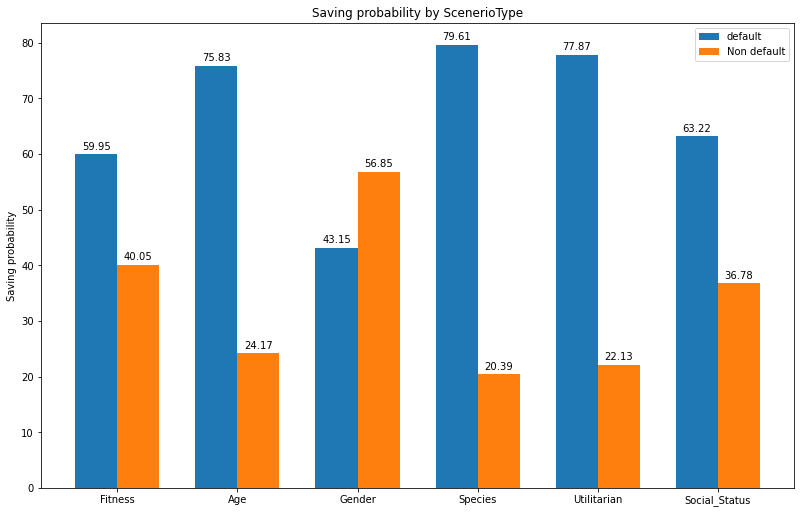

In [120]:
labels = ['Fitness', 'Age', 'Gender', 'Species', 'Utilitarian', 'Social_Status']
Default_save_prob = [Fit_save_prob, Young_save_prob, Male_save_prob, Hoomans_save_prob, More_save_prob, High_save_prob]
NonDefault_save_prob = [Fat_save_prob, Old_save_prob, Female_save_prob, Pets_save_prob, Less_save_prob, Low_save_prob]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Default_save_prob, width, label="default")
rects2 = ax.bar(x + width/2, NonDefault_save_prob, width, label="Non default")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Saving probability')
ax.set_title('Saving probability by ScenerioType')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(12, 8)

plt.show()